In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt

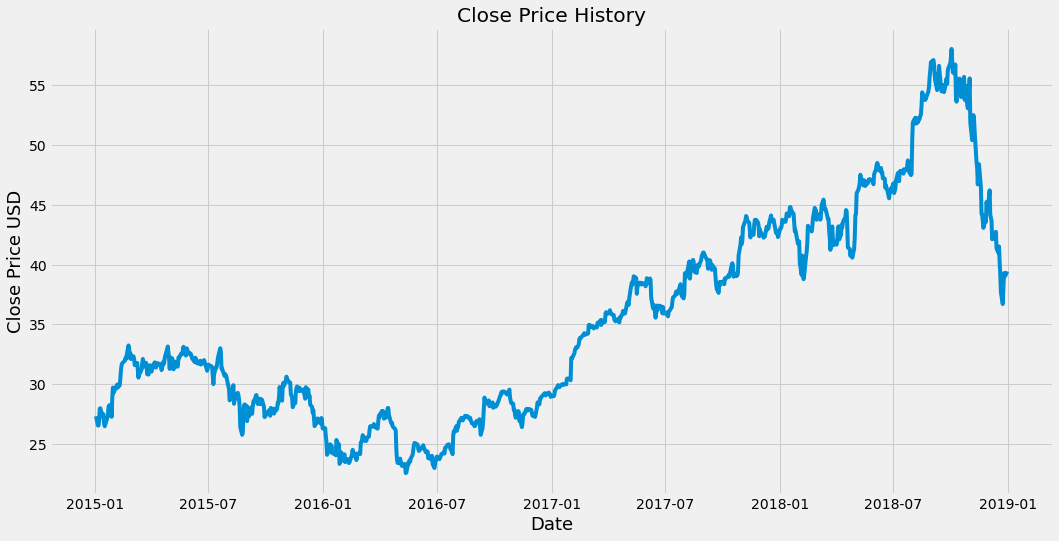

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.800995
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.322155
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,38.073456


In [3]:
plt.style.use('fivethirtyeight')
#Get the stock quote
df = web.DataReader('AAPL',data_source ='yahoo',start = '2015-01-01',end = '2019-01-01')
df.head
df.shape
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD' ,fontsize=18)
plt.show()
df

In [6]:
#Create a new data frame with only the Close column
data = df.filter(['Close'])

In [7]:
#Convert the dataframe to a numpy array
dataset = data.values

In [8]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

805

In [9]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data
x_train = []
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train),np.array(y_train)

In [11]:
#Reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(946, 60, 1)

In [12]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
#Train the model
history = model.fit(x_train,y_train,batch_size=32,epochs=1000)

Epoch 1/1000
30/30 [==============================] - 5s 35ms/step - loss: 0.0665
Epoch 2/1000
30/30 [==============================] - 1s 34ms/step - loss: 0.0049
Epoch 3/1000
30/30 [==============================] - 1s 35ms/step - loss: 0.0030
Epoch 4/1000
30/30 [==============================] - 1s 35ms/step - loss: 0.0034
Epoch 5/1000
30/30 [==============================] - 1s 34ms/step - loss: 0.0024
Epoch 6/1000
30/30 [==============================] - 1s 34ms/step - loss: 0.0024
Epoch 7/1000
30/30 [==============================] - 1s 34ms/step - loss: 0.0030
Epoch 8/1000
30/30 [==============================] - 1s 37ms/step - loss: 0.0025
Epoch 9/1000
30/30 [==============================] - 1s 40ms/step - loss: 0.0023
Epoch 10/1000
30/30 [==============================] - 1s 35ms/step - loss: 0.0023
Epoch 11/1000
30/30 [==============================] - 1s 34ms/step - loss: 0.0021
Epoch 12/1000
30/30 [==============================] - 1s 35ms/step - loss: 0.0019
Epoch 13/1000

30/30 [==============================] - 1s 36ms/step - loss: 0.0010
Epoch 99/1000
30/30 [==============================] - 1s 36ms/step - loss: 8.2835e-04
Epoch 100/1000
30/30 [==============================] - 1s 36ms/step - loss: 9.0472e-04
Epoch 101/1000
30/30 [==============================] - 1s 36ms/step - loss: 9.5496e-04
Epoch 102/1000
30/30 [==============================] - 1s 41ms/step - loss: 0.0010
Epoch 103/1000
30/30 [==============================] - 1s 37ms/step - loss: 8.9246e-04
Epoch 104/1000
30/30 [==============================] - 1s 36ms/step - loss: 9.2114e-04
Epoch 105/1000
30/30 [==============================] - 1s 36ms/step - loss: 8.3280e-04
Epoch 106/1000
30/30 [==============================] - 1s 37ms/step - loss: 8.7223e-04
Epoch 107/1000
30/30 [==============================] - 1s 47ms/step - loss: 9.1656e-04
Epoch 108/1000
30/30 [==============================] - 1s 46ms/step - loss: 9.1297e-04
Epoch 109/1000
30/30 [==============================] - 

30/30 [==============================] - 1s 45ms/step - loss: 7.8966e-04
Epoch 192/1000
30/30 [==============================] - 1s 46ms/step - loss: 9.9193e-04
Epoch 193/1000
30/30 [==============================] - 2s 53ms/step - loss: 9.2613e-04
Epoch 194/1000
30/30 [==============================] - 1s 39ms/step - loss: 8.1864e-04
Epoch 195/1000
30/30 [==============================] - 1s 38ms/step - loss: 8.3807e-04
Epoch 196/1000
30/30 [==============================] - 1s 37ms/step - loss: 8.5527e-04
Epoch 197/1000
30/30 [==============================] - 1s 36ms/step - loss: 7.6947e-04
Epoch 198/1000
30/30 [==============================] - 1s 36ms/step - loss: 7.7969e-04
Epoch 199/1000
30/30 [==============================] - 1s 36ms/step - loss: 7.2803e-04
Epoch 200/1000
30/30 [==============================] - 1s 37ms/step - loss: 8.3345e-04
Epoch 201/1000
30/30 [==============================] - 1s 37ms/step - loss: 7.4937e-04
Epoch 202/1000
30/30 [=========================

30/30 [==============================] - 1s 38ms/step - loss: 7.5408e-04
Epoch 285/1000
30/30 [==============================] - 1s 37ms/step - loss: 9.4434e-04
Epoch 286/1000
30/30 [==============================] - 1s 38ms/step - loss: 7.6093e-04
Epoch 287/1000
30/30 [==============================] - 1s 38ms/step - loss: 8.0685e-04
Epoch 288/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.8899e-04
Epoch 289/1000
30/30 [==============================] - 1s 42ms/step - loss: 7.6582e-04
Epoch 290/1000
30/30 [==============================] - 1s 45ms/step - loss: 8.2435e-04
Epoch 291/1000
30/30 [==============================] - 1s 38ms/step - loss: 8.2506e-04
Epoch 292/1000
30/30 [==============================] - 1s 37ms/step - loss: 7.1964e-04
Epoch 293/1000
30/30 [==============================] - 1s 38ms/step - loss: 8.6959e-04
Epoch 294/1000
30/30 [==============================] - 1s 38ms/step - loss: 7.2120e-04
Epoch 295/1000
30/30 [=========================

30/30 [==============================] - 1s 37ms/step - loss: 8.3473e-04
Epoch 377/1000
30/30 [==============================] - 1s 37ms/step - loss: 8.0582e-04
Epoch 378/1000
30/30 [==============================] - 1s 39ms/step - loss: 7.2648e-04
Epoch 379/1000
30/30 [==============================] - 1s 43ms/step - loss: 9.5907e-04
Epoch 380/1000
30/30 [==============================] - 1s 39ms/step - loss: 8.0985e-04
Epoch 381/1000
30/30 [==============================] - 1s 45ms/step - loss: 7.8359e-04
Epoch 382/1000
30/30 [==============================] - 1s 40ms/step - loss: 8.2534e-04
Epoch 383/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.7186e-04
Epoch 384/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.7640e-04
Epoch 385/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.4819e-04
Epoch 386/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.5811e-04
Epoch 387/1000
30/30 [=========================

30/30 [==============================] - 1s 39ms/step - loss: 7.4925e-04
Epoch 470/1000
30/30 [==============================] - 1s 44ms/step - loss: 9.0360e-04
Epoch 471/1000
30/30 [==============================] - 1s 38ms/step - loss: 8.2677e-04
Epoch 472/1000
30/30 [==============================] - 1s 45ms/step - loss: 6.6079e-04
Epoch 473/1000
30/30 [==============================] - 1s 49ms/step - loss: 7.4024e-04
Epoch 474/1000
30/30 [==============================] - 2s 52ms/step - loss: 5.9880e-04
Epoch 475/1000
30/30 [==============================] - 1s 43ms/step - loss: 7.2876e-04
Epoch 476/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.7898e-04
Epoch 477/1000
30/30 [==============================] - 1s 37ms/step - loss: 6.9643e-04
Epoch 478/1000
30/30 [==============================] - 1s 37ms/step - loss: 7.4929e-04
Epoch 479/1000
30/30 [==============================] - 1s 37ms/step - loss: 7.5759e-04
Epoch 480/1000
30/30 [=========================

30/30 [==============================] - 1s 38ms/step - loss: 8.3770e-04
Epoch 563/1000
30/30 [==============================] - 1s 42ms/step - loss: 8.0603e-04
Epoch 564/1000
30/30 [==============================] - 1s 40ms/step - loss: 8.6403e-04
Epoch 565/1000
30/30 [==============================] - 1s 44ms/step - loss: 8.0122e-04
Epoch 566/1000
30/30 [==============================] - 1s 39ms/step - loss: 6.5896e-04
Epoch 567/1000
30/30 [==============================] - 1s 37ms/step - loss: 7.6258e-04
Epoch 568/1000
30/30 [==============================] - 1s 39ms/step - loss: 6.7427e-04
Epoch 569/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.4101e-04
Epoch 570/1000
30/30 [==============================] - 1s 42ms/step - loss: 6.4101e-04
Epoch 571/1000
30/30 [==============================] - 1s 42ms/step - loss: 5.6736e-04
Epoch 572/1000
30/30 [==============================] - 1s 39ms/step - loss: 8.2207e-04
Epoch 573/1000
30/30 [=========================

30/30 [==============================] - 1s 38ms/step - loss: 7.4503e-04
Epoch 656/1000
30/30 [==============================] - 1s 38ms/step - loss: 7.5191e-04
Epoch 657/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.2748e-04
Epoch 658/1000
30/30 [==============================] - 1s 46ms/step - loss: 6.0631e-04
Epoch 659/1000
30/30 [==============================] - 1s 47ms/step - loss: 7.0302e-04
Epoch 660/1000
30/30 [==============================] - 2s 52ms/step - loss: 7.0529e-04: 0s - loss: 6.9809e
Epoch 661/1000
30/30 [==============================] - 1s 38ms/step - loss: 7.3392e-04
Epoch 662/1000
30/30 [==============================] - 1s 37ms/step - loss: 6.4266e-04
Epoch 663/1000
30/30 [==============================] - 1s 39ms/step - loss: 6.5653e-04
Epoch 664/1000
30/30 [==============================] - 1s 43ms/step - loss: 6.9020e-04
Epoch 665/1000
30/30 [==============================] - 1s 39ms/step - loss: 7.6125e-04
Epoch 666/1000
30/30 [=====

30/30 [==============================] - 1s 41ms/step - loss: 6.6260e-04
Epoch 748/1000
30/30 [==============================] - 1s 45ms/step - loss: 7.2510e-04
Epoch 749/1000
30/30 [==============================] - 1s 43ms/step - loss: 7.9327e-04
Epoch 750/1000
30/30 [==============================] - 1s 44ms/step - loss: 9.0359e-04
Epoch 751/1000
30/30 [==============================] - 1s 45ms/step - loss: 7.2766e-04: 1s - los
Epoch 752/1000
30/30 [==============================] - 1s 46ms/step - loss: 7.7333e-04 - los
Epoch 753/1000
30/30 [==============================] - 1s 44ms/step - loss: 8.1448e-04
Epoch 754/1000
30/30 [==============================] - 1s 43ms/step - loss: 7.7552e-04
Epoch 755/1000
30/30 [==============================] - 1s 43ms/step - loss: 7.5182e-04
Epoch 756/1000
30/30 [==============================] - 1s 47ms/step - loss: 7.0458e-04
Epoch 757/1000
30/30 [==============================] - 1s 43ms/step - loss: 7.1022e-04
Epoch 758/1000
30/30 [=========

30/30 [==============================] - 1s 39ms/step - loss: 6.5658e-04
Epoch 840/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.0919e-04
Epoch 841/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.6779e-04
Epoch 842/1000
30/30 [==============================] - 1s 37ms/step - loss: 6.7695e-04
Epoch 843/1000
30/30 [==============================] - 1s 39ms/step - loss: 8.4478e-04
Epoch 844/1000
30/30 [==============================] - 1s 38ms/step - loss: 6.0209e-04
Epoch 845/1000
30/30 [==============================] - 1s 39ms/step - loss: 6.6463e-04
Epoch 846/1000
30/30 [==============================] - 1s 41ms/step - loss: 6.2527e-04
Epoch 847/1000
30/30 [==============================] - 1s 39ms/step - loss: 7.0910e-04
Epoch 848/1000
30/30 [==============================] - 1s 37ms/step - loss: 6.2641e-04
Epoch 849/1000
30/30 [==============================] - 1s 40ms/step - loss: 6.8074e-04
Epoch 850/1000
30/30 [=========================

30/30 [==============================] - 1s 40ms/step - loss: 6.5709e-04
Epoch 932/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.3835e-04
Epoch 933/1000
30/30 [==============================] - 1s 39ms/step - loss: 7.4099e-04
Epoch 934/1000
30/30 [==============================] - 1s 39ms/step - loss: 6.2951e-04
Epoch 935/1000
30/30 [==============================] - 1s 39ms/step - loss: 8.8465e-04
Epoch 936/1000
30/30 [==============================] - 1s 40ms/step - loss: 7.3451e-04
Epoch 937/1000
30/30 [==============================] - 1s 39ms/step - loss: 7.6833e-04
Epoch 938/1000
30/30 [==============================] - 1s 38ms/step - loss: 5.8558e-04
Epoch 939/1000
30/30 [==============================] - 1s 40ms/step - loss: 6.8730e-04
Epoch 940/1000
30/30 [==============================] - 1s 46ms/step - loss: 7.5530e-04
Epoch 941/1000
30/30 [==============================] - 1s 44ms/step - loss: 7.9006e-04
Epoch 942/1000
30/30 [=========================

[0.02996273711323738, 0.004307072144001722, 0.003256441093981266, 0.00300449226051569, 0.0025940584018826485, 0.002442729426547885, 0.0025925827212631702, 0.002595149213448167, 0.002314130077138543, 0.002287742681801319, 0.002094367053359747, 0.001956458203494549, 0.002001853659749031, 0.0018179650651291013, 0.0018807162996381521, 0.001737780636176467, 0.0016944723902270198, 0.0017577250255271792, 0.0019135517068207264, 0.001693578204140067, 0.0016572418389841914, 0.001539883203804493, 0.001558371470309794, 0.0014556670794263482, 0.0015161011833697557, 0.0014362764777615666, 0.0013890158152207732, 0.0015505474293604493, 0.0014102163258939981, 0.0014918980887159705, 0.001201312174089253, 0.0011278516612946987, 0.0012311002938076854, 0.001203375868499279, 0.0013874724972993135, 0.0015703679528087378, 0.0012658513151109219, 0.0012047518976032734, 0.0012117227306589484, 0.0011620242148637772, 0.001444898429326713, 0.0011775533203035593, 0.00111893389839679, 0.0013700370909646153, 0.0010559

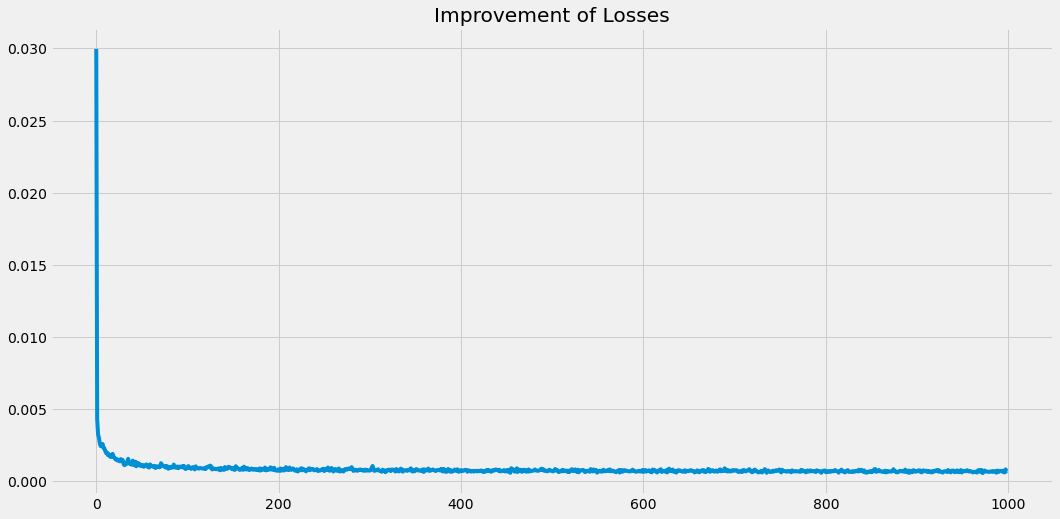

In [15]:
#Plotting the losses of each epoch
print(history.history['loss'])
loss_history = history.history['loss']

plt.figure(figsize=(16,8))
plt.title("Improvement of Losses")
plt.plot(loss_history)

In [17]:
#Create the testing data set
#Create a new array containing scaled values from index 1348 to 1808
test_data = scaled_data

In [18]:
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[60:len(test_data)]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
len(x_test)

946

In [19]:
#Convert the data to a numpy array -LSTM Models want 3D shape
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0] , x_test.shape[1] , 1 ))

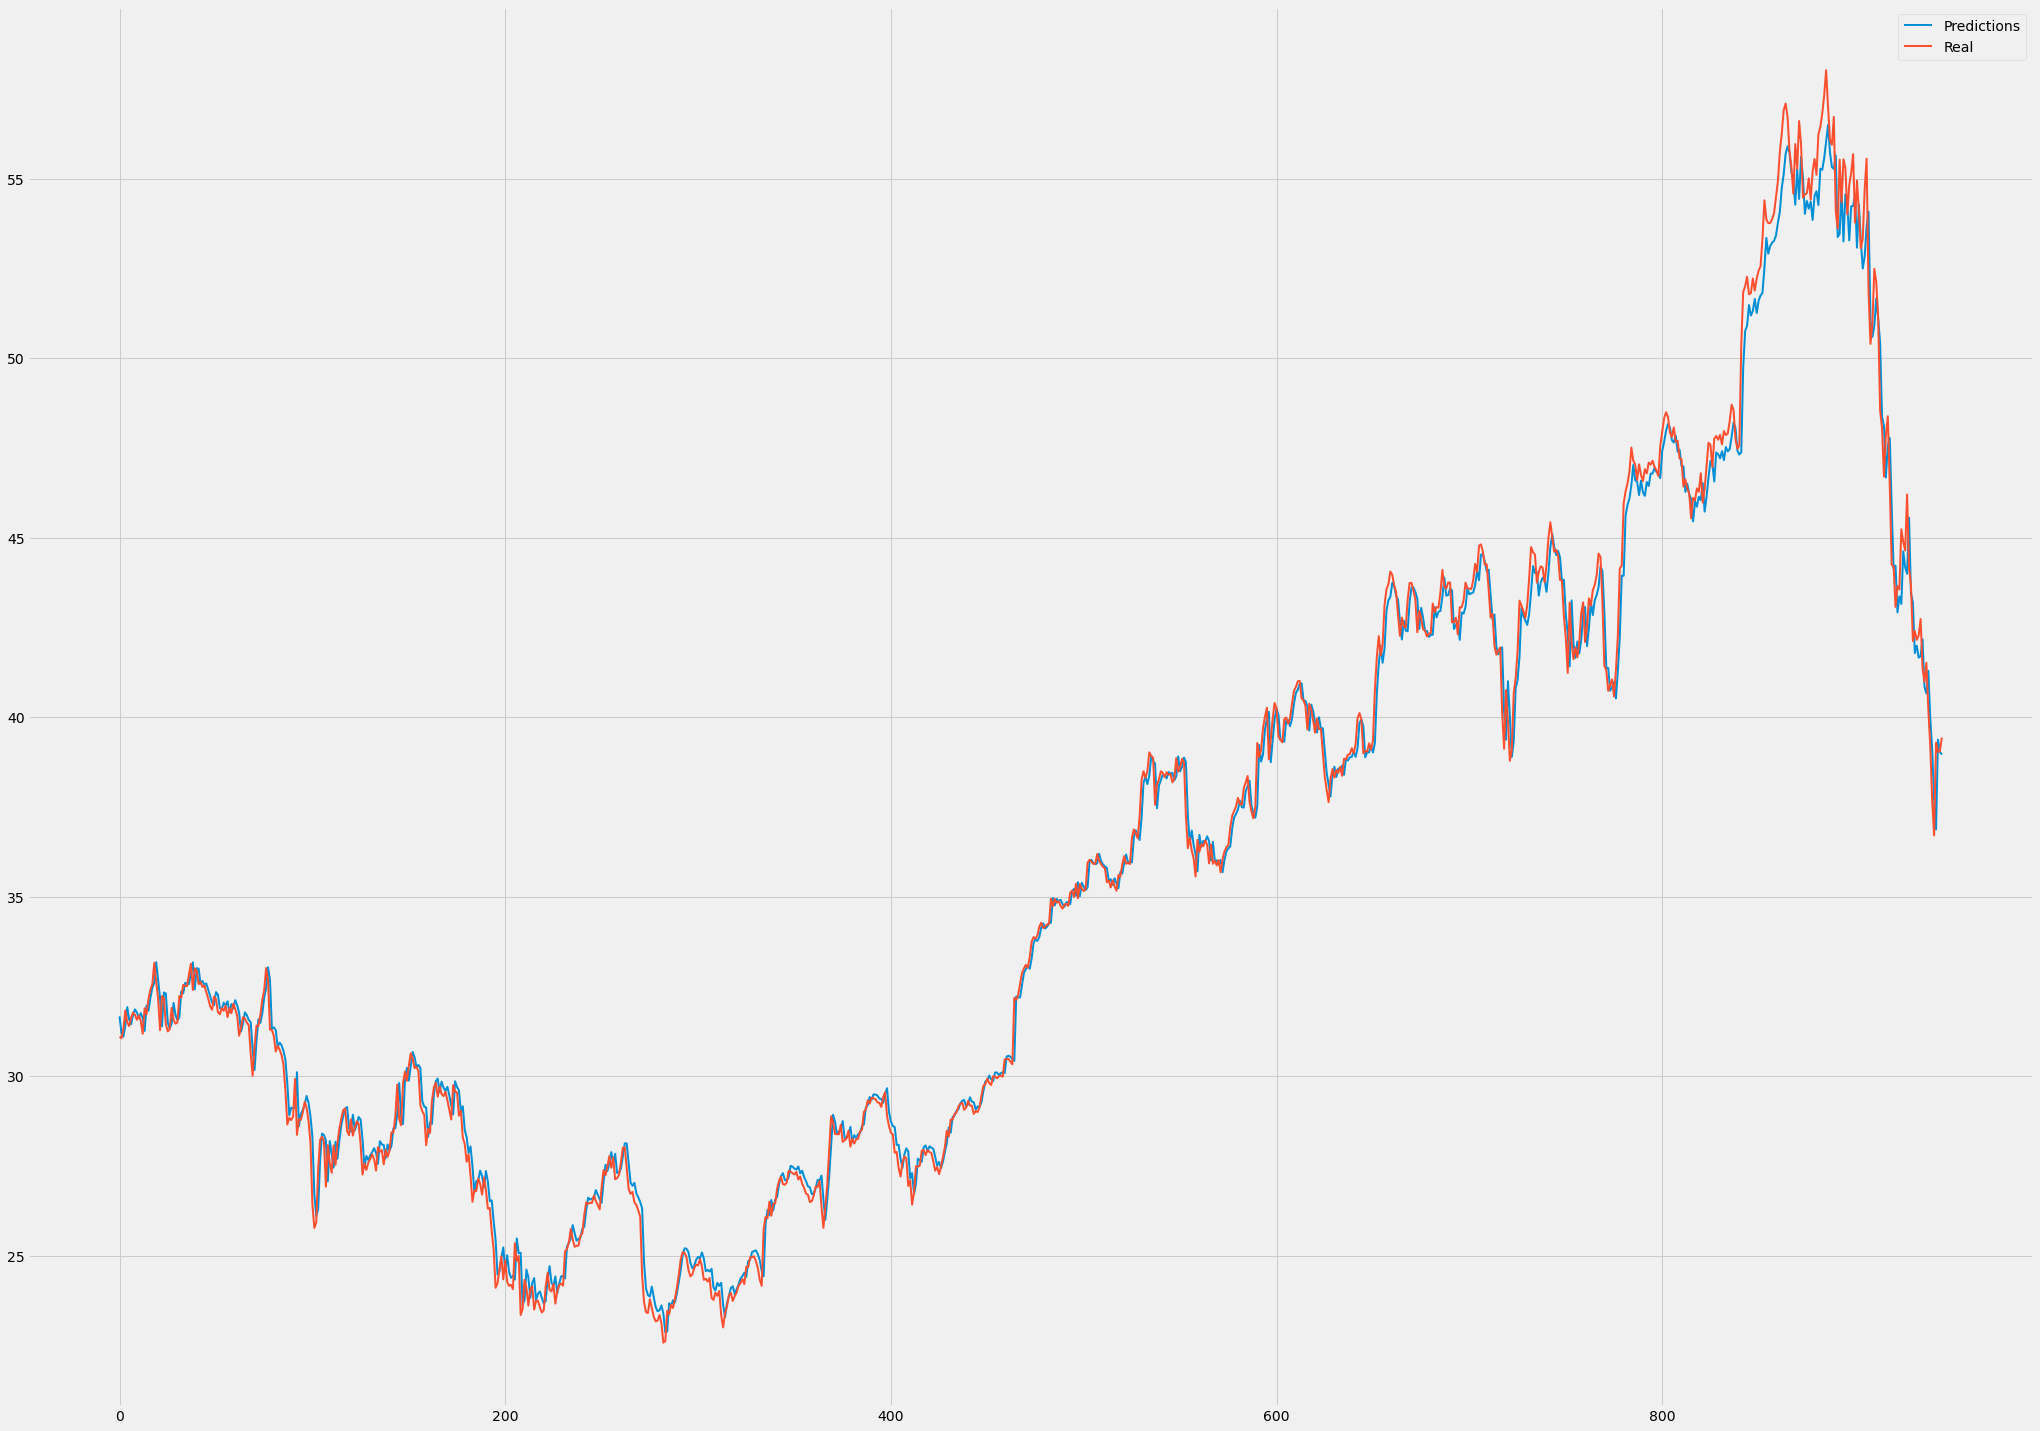

In [20]:
#Get the models predicted price values (x_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Unscale the values
plt.figure(figsize=(32,24))
plt.plot(predictions,linewidth=2)
plt.plot(y_test,linewidth =2)
plt.legend(['Predictions','Real'])
plt.show()
open_prices = df.filter(['Open'])
open_prices = open_prices[60:]
len(open_prices)

open_prices = np.array(open_prices)

In [ ]:
#Total counts
count_fall=0
count_rise=0
rising=[]
falling=[]
diff_th =0.5
for i in range (0,len(y_test)):
  if (open_prices[i]-y_test[i])>diff_th:
    falling.append(i)

for i in range(0,len(y_test)):
  if (open_prices[i]-y_test[i])<-diff_th:
    rising.append(i)

In [ ]:
#Copmparing the prices between predicted close price and next 
days open prices

rising_pred =[]
falling_pred=[]
point_rise=[]
point_fall=[]

diff = 0

for i in falling:
  if (open_prices[i]-predictions[i])>diff:
    count_fall=count_fall+1
    point_fall.append(i) 
 
for i in rising:
 if (open_prices[i]-predictions[i])<diff:
    count_rise=count_rise+1
    point_rise.append(i)
print(len(rising))
print(len(falling))

print(count_fall,count_rise)
percent_fall = count_fall/len(falling)*100
percent_rise = count_rise/len(rising)*100   
print(percent_fall)    
print(percent_rise)
plt.figure(figsize=(32,24))
plt.plot(y_test,linewidth=1,marker='o',markevery=point_fall,markerfacecolor='Red')
plt.plot(open_prices,linewidth=1,marker='o',markevery=point_rise,markerfacecolor='Green')
#plt.scatter(rising,rising_pred,color='green')
#plt.scatter(falling,falling_pred,color='red')
plt.legend(['Predictions','Open Prices','Rising','Falling'])
zoom_ytest = y_test[100:200]
zoom_open = open_prices[100:200]
zoom_mark_f = [2, 9, 12, 15, 24, 26, 32, 35, 37, 39, 49, 52, 53, 58, 61, 65, 67, 70, 71, 72, 74, 82, 83, 87, 90, 93, 96, 98, 99]
zoom_mark_r = [1,5,6,19,23,28,29,36,60,66,75,92]

plt.figure(figsize=(16,8))
plt.plot(zoom_ytest,linewidth=1,marker='o',markevery=zoom_mark_f,markerfacecolor='Red')
plt.plot(zoom_open,linewidth=1,marker='o',markevery=zoom_mark_r,markerfacecolor='Green')
plt.legend(['Predictions','Open Prices','Rising','Falling'])